In [1]:
# Импорт необходимых инструментов
from PIL import Image
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage.io import imsave, imread

In [2]:
# Смена исходных изображений на ЧБ формат
first_image = Image.open("./images/main_1.jpg")
first_image = first_image.convert('L')
first_image.save('./images/main_1_black.jpg')

second_image = Image.open("./images/main_2.jpg")
second_image = second_image.convert('L')
second_image.save('./images/main_2_black.jpg')

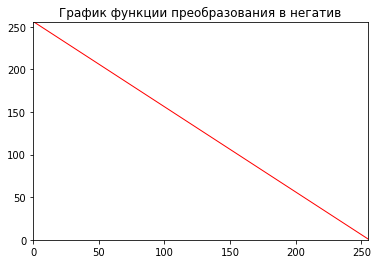

In [7]:
# Преобразование ЧБ изображений в негатив

def negative_function():
    x = np.arange(0, 256, 0.01)
    y = np.arange(256, 0, -0.01)

    plt.plot(x, y, 'r', linewidth=1)
    plt.title ('График функции преобразования в негатив')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()


first_image = Image.open("./images/main_1_black.jpg")
second_image = Image.open("./images/main_2_black.jpg")


for i in range(0, first_image.size[0]-1):
    for j in range(0, first_image.size[1]-1):
        pixel_color_val = first_image.getpixel((i,j))
        new_pixel = 255 - pixel_color_val
        first_image.putpixel((i,j), new_pixel)


for i in range(0, second_image.size[0]-1):
    for j in range(0, second_image.size[1]-1):
        pixel_color_val = second_image.getpixel((i,j))
        new_pixel = 255 - pixel_color_val
        second_image.putpixel((i,j), new_pixel)


negative_function()

first_image.save('./images/main_1_negative.jpg')
second_image.save('./images/main_2_negative.jpg')

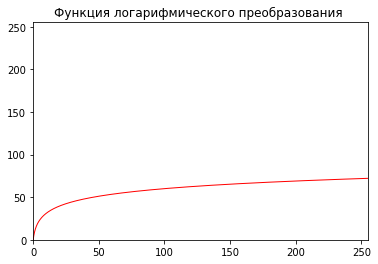

C:\Users\Dmitr\AppData\Local\Temp/ipykernel_7056/338422763.py:13: RuntimeWarning: divide by zero encountered in log
  output = coef * np.log(1 + img)


True

In [17]:
 # Логарифмическое преобразование

def logarithm_function(coef):
    x = np.arange(0, 256, 0.01)
    y = coef * np.log(1 + x)
    plt.plot(x, y, 'r', linewidth=1)
    plt.title('Функция логарифмического преобразования ')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.show()

def logarithm_transformation(coef,img):
    output = coef * np.log(1 + img)
    output = np.uint8(output + 0.5)
    return output


first_image = cv2.imread('./images/main_1_black.jpg')
second_image = cv2.imread('./images/main_2_black.jpg')


logarithm_function(13)
first_image = logarithm_transformation(13, first_image)
second_image = logarithm_transformation(13, second_image)

cv2.imwrite('./images/main_1_logarithm.jpg', first_image)
cv2.imwrite('./images/main_2_logarithm.jpg', second_image)

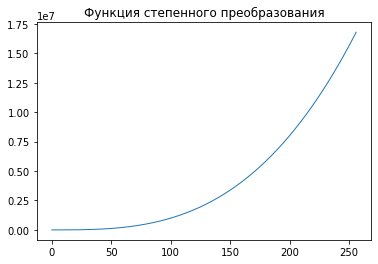

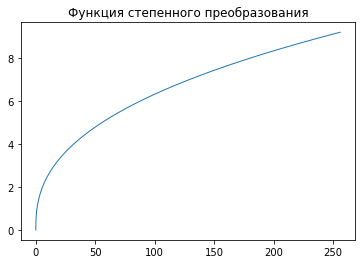

In [18]:
# Степенное преобразование

def degree_function(coef):
     x = np.arange(0, 256, 0.01)
     y = x**coef
     plt.plot(x, y, linewidth=1)
     plt.title('Функция степенного преобразования')
     plt.show()


first_image = img_as_float(Image.open('./images/main_1_black.jpg'))
second_image = img_as_float(Image.open('./images/main_2_black.jpg'))

main_1_deg_more = exposure.adjust_gamma(first_image, 3)
main_2_deg_more = exposure.adjust_gamma(second_image, 3)

main_1_deg_less = exposure.adjust_gamma(first_image, 0.4)
main_2_deg_less = exposure.adjust_gamma(second_image, 0.4)

imsave('./images/main_1_deg_more.jpg', (main_1_deg_more * 255).astype(np.uint8))
imsave('./images/main_2_deg_more.jpg', (main_2_deg_more * 255).astype(np.uint8))
imsave('./images/main_1_deg_less.jpg', (main_1_deg_less * 255).astype(np.uint8))
imsave('./images/main_2_deg_less.jpg', (main_2_deg_less * 255).astype(np.uint8))

degree_function(3)
degree_function(0.4)

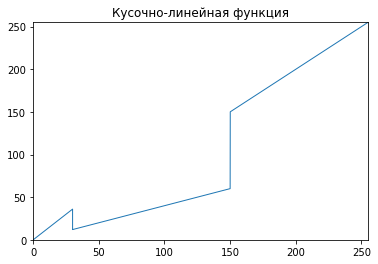

In [20]:
# Кусочно-линейная функция преобразования

def piecewise_linear_transformation(image):
    img_gray = cv2.imread(image, flags=0)  # flags=0  Read as grayscale image

    height, width = img_gray.shape[:2]

    img_stretch = np.empty((height, width), np.uint8)

    k1 = 1.3  # imgGray[h,w] < r1:
    k2 = 1  # r1 <= imgGray[h,w] <= r2
    k3 = 0.5  # imgGray[h,w] > r2
    for h in range(height):
        for w in range(width):
            if img_gray[h, w] < 30:
                img_stretch[h, w] = k1 * img_gray[h, w]
            elif 30 <= img_gray[h, w] <= 150:
                img_stretch[h, w] = k2 * (img_gray[h, w])
            elif img_gray[h, w] > 150:
                img_stretch[h, w] = k3 * (img_gray[h, w])

    return img_stretch

def piecewise_plot():
     x = np.arange(0, 256, 0.01)
     func = lambda t: t*1.2 if t < 30 else t * 0.4 if 30 <= t <= 150 else t* 1
     vfunc = np.vectorize(func)
     y = vfunc(x.copy())
     plt.plot(x, y, linewidth=1)

     plt.title('Кусочно-линейная функция')
     plt.xlim(0, 255), plt.ylim(0, 255)
     plt.show()
 
first_image = piecewise_linear_transformation('./images/main_1_black.jpg')
second_image = piecewise_linear_transformation('./images/main_2_black.jpg')
piecewise_plot()

imsave('./images/main_1_sl.jpg', first_image)
imsave('./images/main_2_sl.jpg', second_image)